<a href="https://colab.research.google.com/github/kunakl07/Killer-Whale-sound-classification/blob/master/Orca_Ketos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install ketos

     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 83.1MB 37kB/s 
     |████████████████████████████████| 194kB 39.0MB/s 
     |████████████████████████████████| 3.1MB 45.0MB/s 
  Created wheel for ketos: filename=ketos-1.1.5-cp36-none-any.whl size=153152 sha256=8df4590655ebd726bd85e14105ee89854ca38b5e0b988a98102a5234e7337605
  Stored in directory: /root/.cache/pip/wheels/bd/e2/d3/4286f2bba03f33d40e03a12fa6f2b45bd56ddea29ffd8a21a7
  Created wheel for datetime-glob: filename=datetime_glob-1.0.7-cp36-none-any.whl size=7389 sha256=87ada0ca317a37ec4db0bcc44e279960430edb5f392cd499e8bbd895fb61f1d2
  Stored in directory: /root/.cache/pip/wheels/0f/86/c9/de310d166ddb2d6a52628685544c48fd5a167a3ac3dd441809
  Created wheel for lexery: filename=lexery-1.1.0-cp36-none-any.whl size=4784 sha256=56a3bc895ca1aa84ef7ddf0015bf75598c3c2274bab5a49d9804ba7cdcd6c055
  Stored in directory: /root/.cache/pip/wheels/d9/b2/4c/98478b361964b88b670d838a1c764ceae57842941e31

In [0]:
from ketos.neural_networks.cnn import BasicCNN, ConvParams
from ketos.data_handling.database_interface import open_table, parse_labels
from ketos.data_handling.data_feeding import BatchGenerator
from ketos.data_handling.data_handling import to1hot
from tables import open_file
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
# Open a connection to the database
database = open_file("/content/humpback.h5", 'r')

# Open the training dateset
train_tbl = open_table(database, "/train/mel_specs" )
# Open the validation dateset
val_tbl = open_table(database, "/validation/mel_specs" )
# Open the test dateset
test_tbl = open_table(database, "/test/mel_specs")

In [0]:
print("training:", len(train_tbl), "\nvalidation:", len(val_tbl), "\ntest:", len(test_tbl))


training: 1198 
validation: 200 
test: 467


In [0]:
entry_1 = train_tbl[0]  #Select the first entry from the training dataset
print(entry_1['labels']) # Retrieve and print the label

b'[0]'


In [0]:
entry_1['data'].shape


(65, 20)

Text(0.5, 0, 'Time bins ( ~30 ms/bin)')

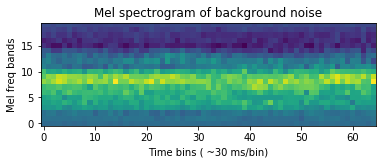

In [0]:
# Plot the data (spectrogram). 
# Transpose the matrix to have a more intuitive plot,
# with time in the x axis and frequency is in the y axis
plt.imshow(entry_1['data'].T, origin=0)
plt.title("Mel spectrogram of background noise")
plt.ylabel("Mel freq bands")
plt.xlabel("Time bins ( ~30 ms/bin)")

In [0]:
entry_2 = train_tbl[1]  #Select the second entry from the training dataset
print(entry_2['labels']) # Retrieve and print the label

b'[1]'


Text(0.5, 0, 'Time bins ( ~30 ms/bin)')

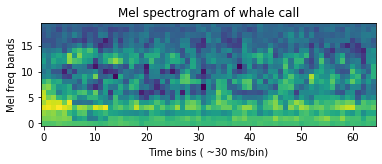

In [0]:
# Plot the data (spectrogram). 
# Transpose the matrix to have a more intuitive plot,
# with time in the x axis and frequency is in the y axis
plt.imshow(entry_2['data'].T, origin=0)
plt.title("Mel spectrogram of whale call")
plt.ylabel("Mel freq bands")
plt.xlabel("Time bins ( ~30 ms/bin)")

In [0]:
def parse_y(y):
    """ Parse an array of labels from byte string to one-hot encoding
    
        Args:
            y: numpy.array
                An array of labels in the the b'[1]' format.
        Returns:
            labels: numpy.array
                An array of labels encoded as one-hot vectors
    
    """
    labels=list(map(lambda l: to1hot(parse_labels(l)[0], depth=2), y ))
    return np.array(labels)


In [0]:
train_x = train_tbl[:]['data']
train_y = parse_y(train_tbl[:]['labels'])
val_x = val_tbl[:]['data']
val_y = parse_y(val_tbl[:]['labels'])
test_x = test_tbl[:]['data']
test_y = parse_y(test_tbl[:]['labels'])

In [0]:
test_y[0:5] # shows the first 5 one-hot vectors


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [0]:
neural_net = BasicCNN(train_x=train_x, train_y=train_y, validation_x=val_x,validation_y=val_y,
            test_x=test_x,test_y=test_y,batch_size=128, seed=567, 
            num_epochs=10)

_ = neural_net.create()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

                   Convolutional layers               
------------------------------------------------------
  Name   Input x Filters   Filter Shape   Output dim. 
------------------------------------------------------
  conv_1       1 x 32          [2,8]         10560
  conv_2       32 x 64          [30,8]         5440
                  Fully connected layers              
------------------------------------------------------
  Name       Size                                      
------------------------------------------------------
  dense_1    512
  class_weights    2


In [0]:
neural_net.train()



Training  started

Epoch  Cost  Train acc.  Val acc.
----------------------------------
 1/10  14837.460  0.586  0.630
 2/10  0.673  0.655  0.630
 3/10  0.843  0.667  0.630
 4/10  0.648  0.655  0.630
 5/10  0.645  0.655  0.630
 6/10  0.645  0.655  0.630
 7/10  0.645  0.655  0.630
 8/10  0.645  0.655  0.630
 9/10  0.645  0.655  0.630
 10/10  0.645  0.655  0.630
----------------------------------


([0.5859375,
  0.6553819444444444,
  0.6666666666666667,
  0.6553819444444444,
  0.6545138888888891,
  0.6545138888888891,
  0.6545138888888891,
  0.6545138888888891,
  0.6545138888888891,
  0.6545138888888891],
 [0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63])

In [0]:
test_acc = neural_net.accuracy_on_test()
print("Test_accuracy:",test_acc)

Test_accuracy: 0.614561


In [0]:
report,mislabelled = neural_net.mislabelled_on_test(print_report=False)


In [0]:
report


,correct,incorrect,%correct,%incorrect,total
0,287,180,61.46,38.54,467


In [0]:
mislabelled


,label,pred
4,1,0
6,1,0
8,1,0
11,1,0
14,1,0
...,...,...
456,1,0
457,1,0
458,1,0
461,1,0


NameError: ignored